# Building the ML model for comparison

Oversampling Accuracy Testing - Error

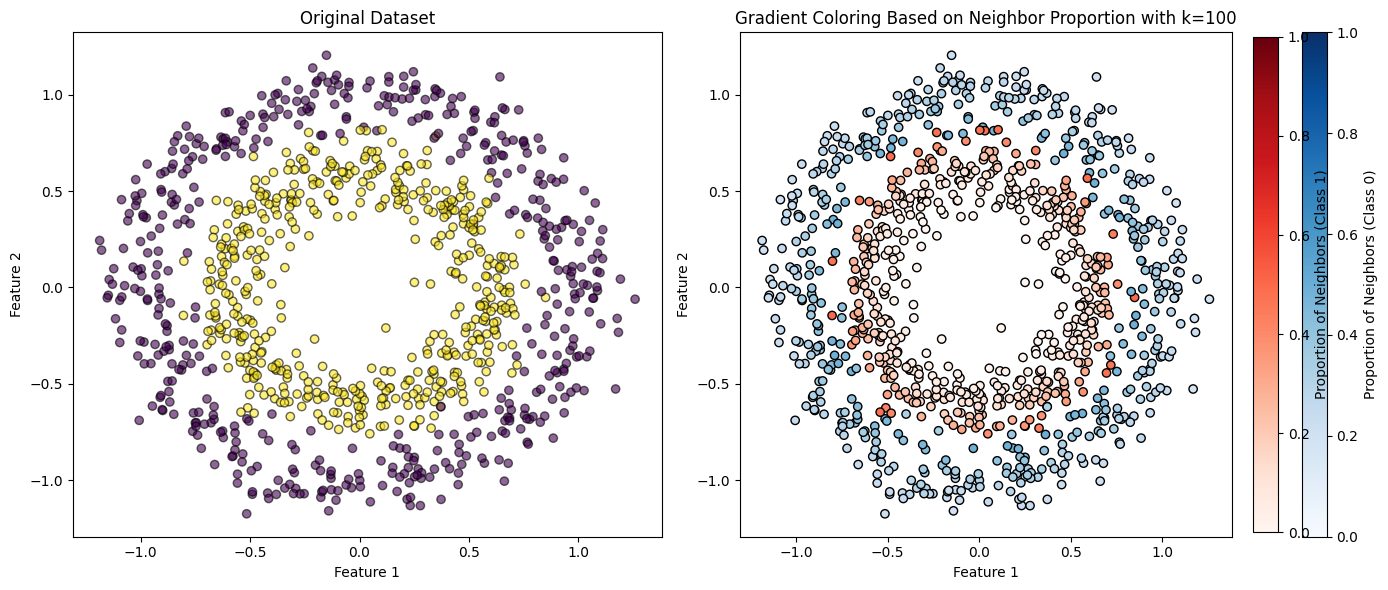

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm

# Parameters
n_samples = 1000
k = 100  # Number of neighbors

# Generate a dataset with a closer doughnut ring
X, y = make_circles(n_samples=n_samples, factor=0.6, noise=0.1)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Calculate the proportion of neighbors in the other class for each point
proportions = []

for i, (x, pred) in enumerate(zip(X, knn.predict(X))):
    neighbors = knn.kneighbors([x], return_distance=False)
    neighbor_classes = y[neighbors[0]]
    count_different_class = np.sum(neighbor_classes != pred)

    # Proportion of neighbors from the other class
    proportion = count_different_class / k
    proportions.append(proportion)

proportions = np.array(proportions)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original graph
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='k', marker='o')
axes[0].set_title('Original Dataset')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Gradient coloring graph with different color schemes
colors = np.zeros((X.shape[0], 4))  # Initialize an array for RGBA colors

# Define colormaps for each class
cmap_class_0 = cm.Blues  # Colormap for class 0
cmap_class_1 = cm.Reds   # Colormap for class 1

for i in range(len(y)):
    if y[i] == 0:
        colors[i] = cmap_class_0(proportions[i])  # Apply Blue colormap for class 0
    else:
        colors[i] = cmap_class_1(proportions[i])  # Apply Red colormap for class 1

scatter = axes[1].scatter(X[:, 0], X[:, 1], color=colors, edgecolors='k', marker='o')
axes[1].set_title(f'Gradient Coloring Based on Neighbor Proportion with k={k}')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Add colorbars to represent the gradient of each class
cbar_0 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_0), ax=axes[1], fraction=0.046, pad=0.04)
cbar_0.set_label('Proportion of Neighbors (Class 0)')
cbar_1 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_1), ax=axes[1], fraction=0.046, pad=0.04)
cbar_1.set_label('Proportion of Neighbors (Class 1)')

# Show the plot
plt.tight_layout()
plt.show()

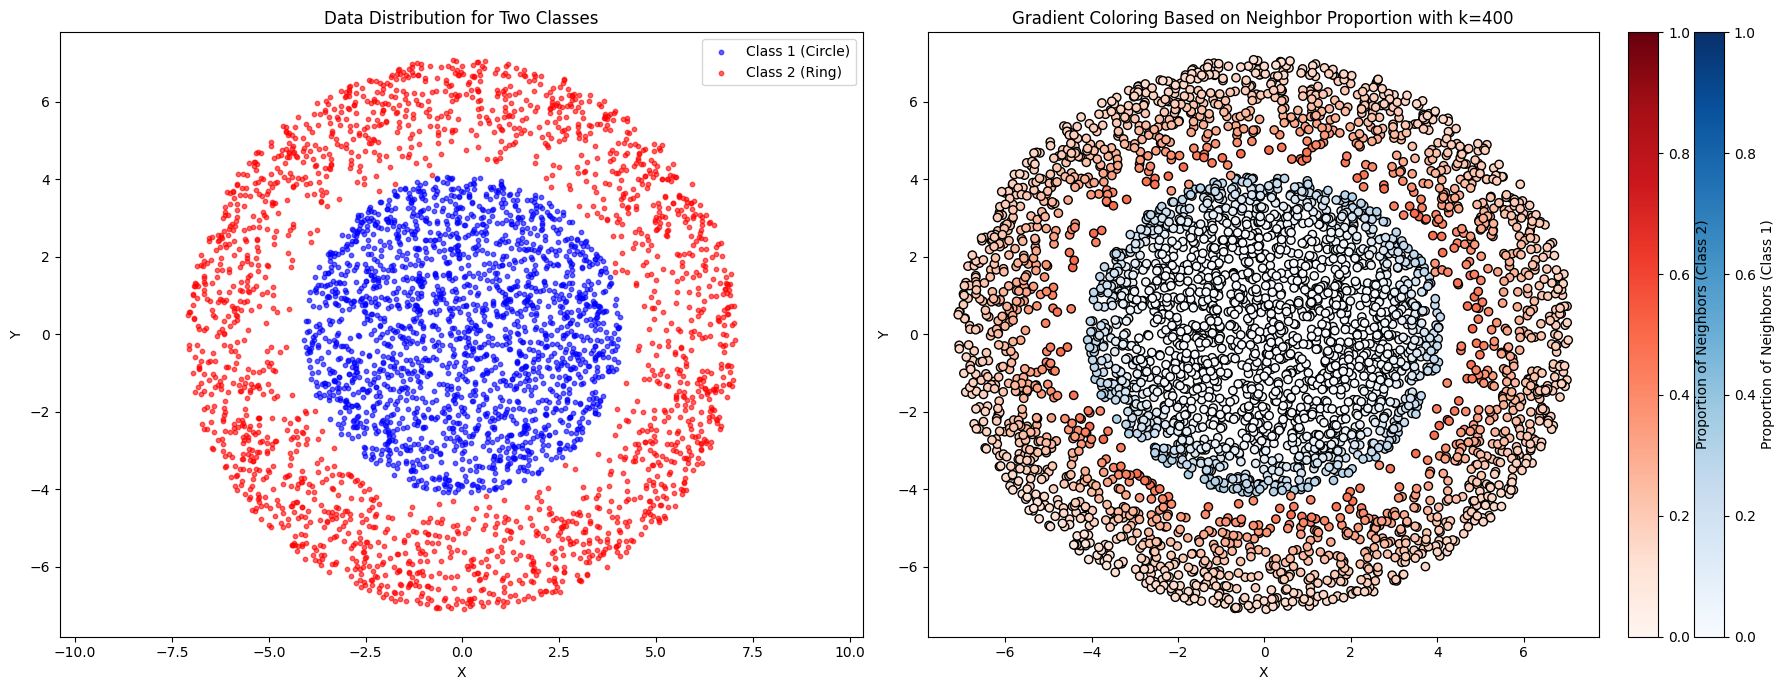

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm

# Parameters
num_points = 2000  # data points in each class
inner_radius = 4.1  # class 1 radius
outer_radius = 4.11  # class 2 radius
ring_width = 3   # width
k = int(0.2 * num_points)  # Set k to be 20% of the total sample size

# Class 1 (Circle)
theta1 = 2 * np.pi * np.random.rand(num_points)
r1 = inner_radius * np.sqrt(np.random.rand(num_points))
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)
class1 = np.vstack((x1, y1)).T

# Class 2 (Ring)
theta2 = 2 * np.pi * np.random.rand(num_points)
r2 = outer_radius + ring_width * np.sqrt(np.random.rand(num_points))
x2 = r2 * np.cos(theta2)
y2 = r2 * np.sin(theta2)
class2 = np.vstack((x2, y2)).T

# Combine the data
data = np.vstack((class1, class2))
labels = np.hstack((np.ones(num_points), np.ones(num_points) * 2))

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data, labels)

# Calculate the proportion of neighbors in the other class for each point
proportions = []

for i, (x, pred) in enumerate(zip(data, knn.predict(data))):
    neighbors = knn.kneighbors([x], return_distance=False)
    neighbor_classes = labels[neighbors[0]]
    count_different_class = np.sum(neighbor_classes != pred)

    # Proportion of neighbors from the other classes
    proportion = count_different_class / k
    proportions.append(proportion)

proportions = np.array(proportions)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Original data distribution
axes[0].scatter(class1[:, 0], class1[:, 1], color='b', label='Class 1 (Circle)', alpha=0.6, s=10)
axes[0].scatter(class2[:, 0], class2[:, 1], color='r', label='Class 2 (Ring)', alpha=0.6, s=10)
axes[0].legend()
axes[0].set_title('Data Distribution for Two Classes')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].axis('equal')

# Gradient coloring graph with different color schemes
colors = np.zeros((data.shape[0], 4))  # Initialize an array for RGBA colors

# Define colormaps for each class
cmap_class_1 = cm.Blues  # Colormap for class 1
cmap_class_2 = cm.Reds   # Colormap for class 2

for i in range(len(labels)):
    if labels[i] == 1:
        colors[i] = cmap_class_1(proportions[i])  # Apply Blue colormap for class 1
    else:
        colors[i] = cmap_class_2(proportions[i])  # Apply Red colormap for class 2

scatter = axes[1].scatter(data[:, 0], data[:, 1], color=colors, edgecolors='k', marker='o')
axes[1].set_title(f'Gradient Coloring Based on Neighbor Proportion with k={k}')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# Add colorbars to represent the gradient of each class
cbar_1 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_1), ax=axes[1], fraction=0.046, pad=0.04)
cbar_1.set_label('Proportion of Neighbors (Class 1)')
cbar_2 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_2), ax=axes[1], fraction=0.046, pad=0.04)
cbar_2.set_label('Proportion of Neighbors (Class 2)')

# Show the plot
plt.tight_layout()
plt.show()


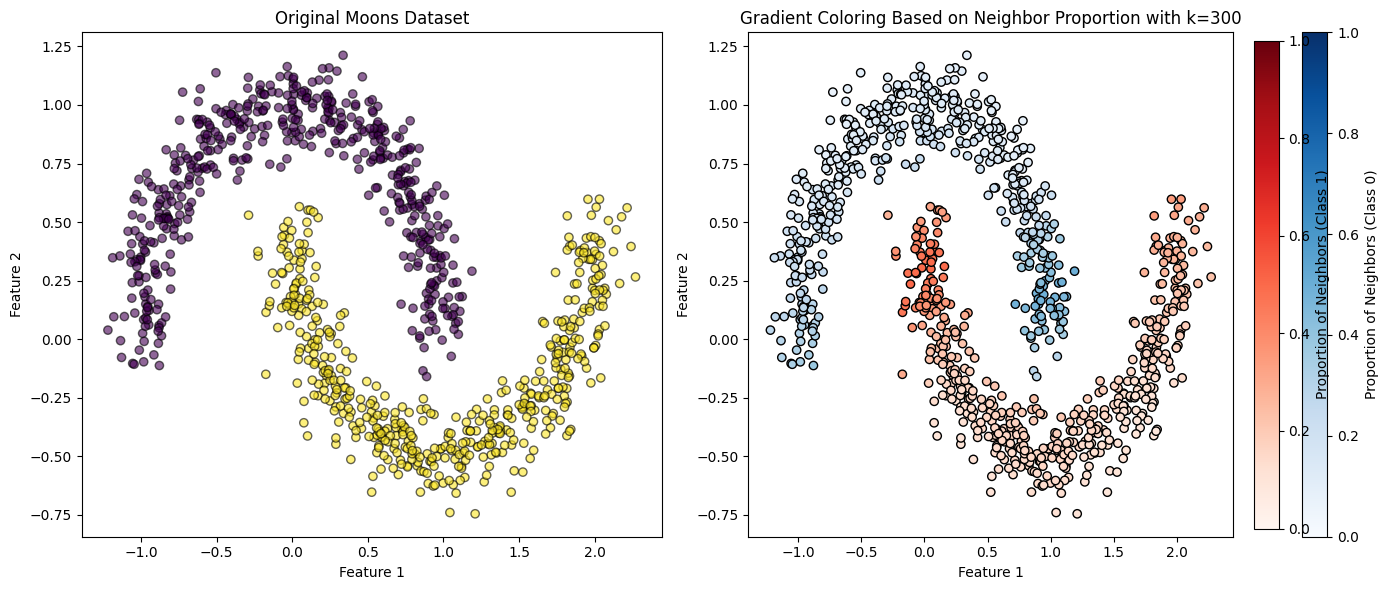

In [12]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm

# Parameters
n_samples = 1000
k = 300  # Number of neighbors

# Generate a moons dataset
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Calculate the proportion of neighbors in the other class for each point
proportions = []

for i, (x, pred) in enumerate(zip(X, knn.predict(X))):
    neighbors = knn.kneighbors([x], return_distance=False)
    neighbor_classes = y[neighbors[0]]
    count_different_class = np.sum(neighbor_classes != pred)

    # Proportion of neighbors from the other class
    proportion = count_different_class / k
    proportions.append(proportion)

proportions = np.array(proportions)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original graph
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='k', marker='o')
axes[0].set_title('Original Moons Dataset')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Gradient coloring graph with different color schemes
colors = np.zeros((X.shape[0], 4))  # Initialize an array for RGBA colors

# Define colormaps for each class
cmap_class_0 = cm.Blues  # Colormap for class 0
cmap_class_1 = cm.Reds   # Colormap for class 1

for i in range(len(y)):
    if y[i] == 0:
        colors[i] = cmap_class_0(proportions[i])  # Apply Blue colormap for class 0
    else:
        colors[i] = cmap_class_1(proportions[i])  # Apply Red colormap for class 1

scatter = axes[1].scatter(X[:, 0], X[:, 1], color=colors, edgecolors='k', marker='o')
axes[1].set_title(f'Gradient Coloring Based on Neighbor Proportion with k={k}')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Add colorbars to represent the gradient of each class
cbar_0 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_0), ax=axes[1], fraction=0.046, pad=0.04)
cbar_0.set_label('Proportion of Neighbors (Class 0)')
cbar_1 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_1), ax=axes[1], fraction=0.046, pad=0.04)
cbar_1.set_label('Proportion of Neighbors (Class 1)')

# Show the plot
plt.tight_layout()
plt.show()



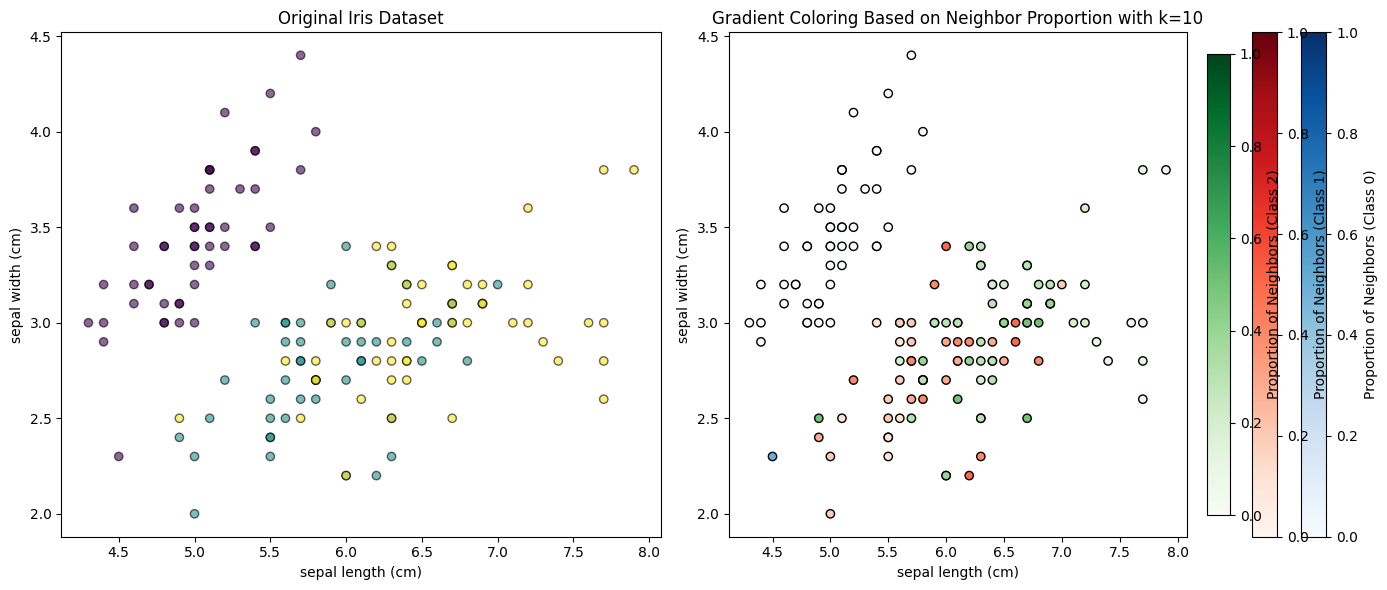

In [16]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm

# Parameters
k = 10  # Number of neighbors

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Calculate the proportion of neighbors in the other classes for each point
proportions = []

for i, (x, pred) in enumerate(zip(X, knn.predict(X))):
    neighbors = knn.kneighbors([x], return_distance=False)
    neighbor_classes = y[neighbors[0]]
    count_different_class = np.sum(neighbor_classes != pred)

    # Proportion of neighbors from the other classes
    proportion = count_different_class / k
    proportions.append(proportion)

proportions = np.array(proportions)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original graph
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='k', marker='o')
axes[0].set_title('Original Iris Dataset')
axes[0].set_xlabel(iris.feature_names[0])
axes[0].set_ylabel(iris.feature_names[1])

# Gradient coloring graph with different color schemes
colors = np.zeros((X.shape[0], 4))  # Initialize an array for RGBA colors

# Define colormaps for each class
cmap_class_0 = cm.Blues  # Colormap for class 0
cmap_class_1 = cm.Reds   # Colormap for class 1
cmap_class_2 = cm.Greens # Colormap for class 2

for i in range(len(y)):
    if y[i] == 0:
        colors[i] = cmap_class_0(proportions[i])  # Apply Blue colormap for class 0
    elif y[i] == 1:
        colors[i] = cmap_class_1(proportions[i])  # Apply Red colormap for class 1
    else:
        colors[i] = cmap_class_2(proportions[i])  # Apply Green colormap for class 2

scatter = axes[1].scatter(X[:, 0], X[:, 1], color=colors, edgecolors='k', marker='o')
axes[1].set_title(f'Gradient Coloring Based on Neighbor Proportion with k={k}')
axes[1].set_xlabel(iris.feature_names[0])
axes[1].set_ylabel(iris.feature_names[1])

# Add colorbars to represent the gradient of each class
cbar_0 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_0), ax=axes[1], fraction=0.046, pad=0.04)
cbar_0.set_label('Proportion of Neighbors (Class 0)')
cbar_1 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_1), ax=axes[1], fraction=0.046, pad=0.04)
cbar_1.set_label('Proportion of Neighbors (Class 1)')
cbar_2 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_2), ax=axes[1], fraction=0.046, pad=0.04)
cbar_2.set_label('Proportion of Neighbors (Class 2)')

# Show the plot
plt.tight_layout()
plt.show()



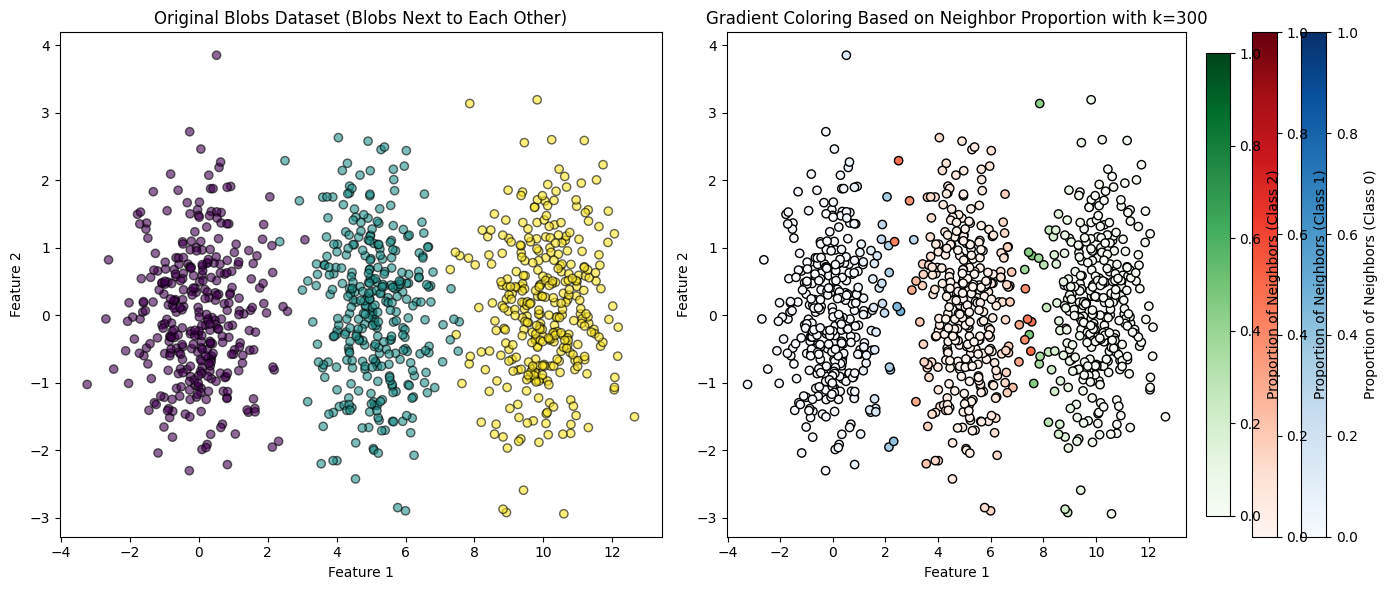

In [26]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm

# Parameters
n_samples = 1000
n_classes = 3
k = int(0.3 * n_samples)  # Set k to be 10% of the total sample size

# Manually specify the centers to place blobs directly next to each other
centers = np.array([[0, 0], [5, 0], [10, 0]])
cluster_std = 1.0  # Standard deviation for each blob

# Generate a dataset with 3 blobs placed next to each other
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Calculate the proportion of neighbors in the other classes for each point
proportions = []

for i, (x, pred) in enumerate(zip(X, knn.predict(X))):
    neighbors = knn.kneighbors([x], return_distance=False)
    neighbor_classes = y[neighbors[0]]
    count_different_class = np.sum(neighbor_classes != pred)

    # Proportion of neighbors from the other classes
    proportion = count_different_class / k
    proportions.append(proportion)

proportions = np.array(proportions)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original graph
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='k', marker='o')
axes[0].set_title('Original Blobs Dataset (Blobs Next to Each Other)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Gradient coloring graph with different color schemes
colors = np.zeros((X.shape[0], 4))  # Initialize an array for RGBA colors

# Define colormaps for each class
cmap_class_0 = cm.Blues  # Colormap for class 0
cmap_class_1 = cm.Reds   # Colormap for class 1
cmap_class_2 = cm.Greens # Colormap for class 2

for i in range(len(y)):
    if y[i] == 0:
        colors[i] = cmap_class_0(proportions[i])  # Apply Blue colormap for class 0
    elif y[i] == 1:
        colors[i] = cmap_class_1(proportions[i])  # Apply Red colormap for class 1
    else:
        colors[i] = cmap_class_2(proportions[i])  # Apply Green colormap for class 2

scatter = axes[1].scatter(X[:, 0], X[:, 1], color=colors, edgecolors='k', marker='o')
axes[1].set_title(f'Gradient Coloring Based on Neighbor Proportion with k={k}')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Add colorbars to represent the gradient of each class
cbar_0 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_0), ax=axes[1], fraction=0.046, pad=0.04)
cbar_0.set_label('Proportion of Neighbors (Class 0)')
cbar_1 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_1), ax=axes[1], fraction=0.046, pad=0.04)
cbar_1.set_label('Proportion of Neighbors (Class 1)')
cbar_2 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_2), ax=axes[1], fraction=0.046, pad=0.04)
cbar_2.set_label('Proportion of Neighbors (Class 2)')

# Show the plot
plt.tight_layout()
plt.show()


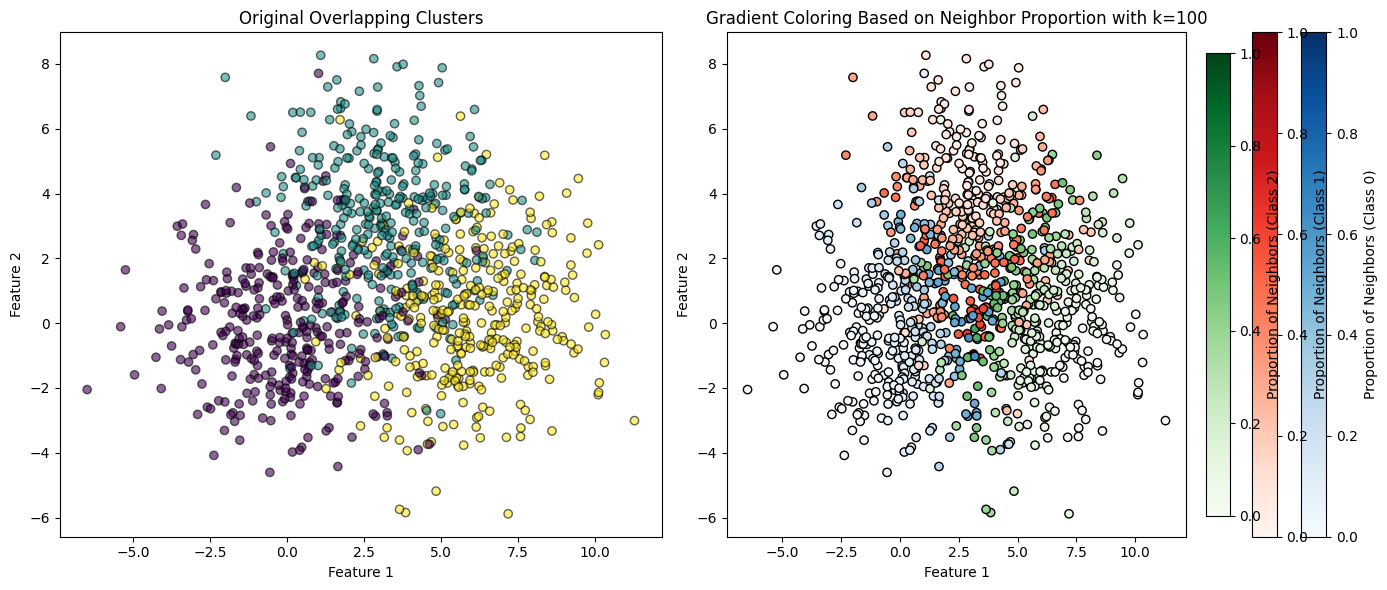

In [27]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm

# Parameters
n_samples = 1000
n_classes = 3
k = int(0.1 * n_samples)  # Set k to be 10% of the total sample size

# Generate a dataset with overlapping clusters
centers = np.array([[0, 0], [3, 3], [6, 0]])  # Centers for the blobs
cluster_std = 2.0  # Larger standard deviation to create overlap

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Calculate the proportion of neighbors in the other classes for each point
proportions = []

for i, (x, pred) in enumerate(zip(X, knn.predict(X))):
    neighbors = knn.kneighbors([x], return_distance=False)
    neighbor_classes = y[neighbors[0]]
    count_different_class = np.sum(neighbor_classes != pred)

    # Proportion of neighbors from the other classes
    proportion = count_different_class / k
    proportions.append(proportion)

proportions = np.array(proportions)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original graph
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='k', marker='o')
axes[0].set_title('Original Overlapping Clusters')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Gradient coloring graph with different color schemes
colors = np.zeros((X.shape[0], 4))  # Initialize an array for RGBA colors

# Define colormaps for each class
cmap_class_0 = cm.Blues  # Colormap for class 0
cmap_class_1 = cm.Reds   # Colormap for class 1
cmap_class_2 = cm.Greens # Colormap for class 2

for i in range(len(y)):
    if y[i] == 0:
        colors[i] = cmap_class_0(proportions[i])  # Apply Blue colormap for class 0
    elif y[i] == 1:
        colors[i] = cmap_class_1(proportions[i])  # Apply Red colormap for class 1
    else:
        colors[i] = cmap_class_2(proportions[i])  # Apply Green colormap for class 2

scatter = axes[1].scatter(X[:, 0], X[:, 1], color=colors, edgecolors='k', marker='o')
axes[1].set_title(f'Gradient Coloring Based on Neighbor Proportion with k={k}')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Add colorbars to represent the gradient of each class
cbar_0 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_0), ax=axes[1], fraction=0.046, pad=0.04)
cbar_0.set_label('Proportion of Neighbors (Class 0)')
cbar_1 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_1), ax=axes[1], fraction=0.046, pad=0.04)
cbar_1.set_label('Proportion of Neighbors (Class 1)')
cbar_2 = fig.colorbar(cm.ScalarMappable(cmap=cmap_class_2), ax=axes[1], fraction=0.046, pad=0.04)
cbar_2.set_label('Proportion of Neighbors (Class 2)')

# Show the plot
plt.tight_layout()
plt.show()
